In [105]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
#Binary logistic regression for density model using different combination of x variable to fit logistic model
#class10:  1/0 classification data represents lodging and non-lodging corns. Regarding >=10% as 1(lodging), else 0(nonlodging)
#class20: Regarding >=20% as 1(lodging), else 0(nonlodging)

In [106]:
fileName = "densityFit/filter3_4rows.csv"
density_4rows = pd.read_csv(fileName)
density_4rows.columns

Index(['Plot', 'ID', 'Percent', 'TotalMSE', 'TotalMean', 'dev1', 'dev2',
       'dev3', 'dev4', 'mean1', 'mean2', 'mean3', 'mean4', 'class10',
       'class20'],
      dtype='object')

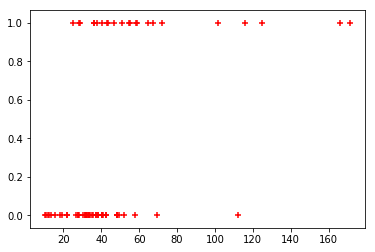

In [107]:
#scatter plot of TotalMSE and class10
plt.scatter(density_4rows.TotalMSE, density_4rows.class10, marker = '+', color = 'red')

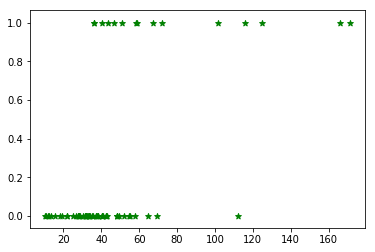

In [108]:
#scatter plot of TotalMSE and class20
plt.scatter(density_4rows.TotalMSE, density_4rows.class20, marker = '*', color = 'green')

In [109]:
#Create new dataFrame and put variables in.
# X_tMSE only contains TotalMSE as X variable
X_tMSE = pd.DataFrame()
X_tMSE['TotalMSE'] = density_4rows['TotalMSE']

# X_Mean only contains TotalMean as X variable
X_Mean = pd.DataFrame()
X_Mean['TOtalMean'] = density_4rows['TotalMean']

# X_MSEdev contains TotalMSE and deviation arrays(ordered standard deviation for each row) as X variable
X_MSEdev = pd.DataFrame()
X_MSEdev['TotalMSE'] = density_4rows['TotalMSE']
X_MSEdev['dev1'] = density_4rows['dev1']
X_MSEdev['dev2'] = density_4rows['dev2']
X_MSEdev['dev3'] = density_4rows['dev3']
X_MSEdev['dev4'] = density_4rows['dev4']

# X_devMean contains deviation arrays(ordered standard deviation for each row) and Mean arrays (ordered mean for each row)as X variable
X_devMean = pd.DataFrame()

X_devMean['dev1'] = density_4rows['dev1']
X_devMean['dev2'] = density_4rows['dev2']
X_devMean['dev3'] = density_4rows['dev3']
X_devMean['dev4'] = density_4rows['dev4']
X_devMean['mean1'] = density_4rows['mean1']
X_devMean['mean2'] = density_4rows['mean2']
X_devMean['mean3'] = density_4rows['mean3']
X_devMean['mean4'] = density_4rows['mean4']


y1 = density_4rows['class10']
y2 = density_4rows['class20']




In [110]:
#scale figures
scaler1 = StandardScaler()
X_MSEdev = scaler1.fit_transform(X_MSEdev)

scaler2 = StandardScaler()
X_devMean = scaler2.fit_transform(X_devMean)




In [111]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_tMSE,y2,test_size=0.5,random_state=42)

Logistic accuracy is 0.82
Logistic AUC = 0.62
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        26
           1       1.00      0.25      0.40         8

    accuracy                           0.82        34
   macro avg       0.91      0.62      0.65        34
weighted avg       0.86      0.82      0.78        34



C:\Users\Jieyun Hu\Anaconda3\envs\image\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


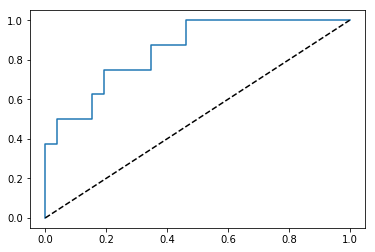

In [112]:
model_MSE = LogisticRegression(penalty='l2',C=2)
model_MSE.fit(X1_train,y1_train)
print("Logistic accuracy is %2.2f" % accuracy_score(y1_test, model_MSE.predict(X1_test)))
logit_roc_auc1 = roc_auc_score(y1_test,model_MSE.predict(X1_test))
print("Logistic AUC = %2.2f" % logit_roc_auc1)
print (classification_report(y1_test,model_MSE.predict(X1_test)))
fpr, tpr, thresholds = roc_curve(y1_test, model_MSE.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.show()

Logistic accuracy is 0.76
Logistic AUC = 0.50
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        26
           1       0.00      0.00      0.00         8

    accuracy                           0.76        34
   macro avg       0.38      0.50      0.43        34
weighted avg       0.58      0.76      0.66        34



C:\Users\Jieyun Hu\Anaconda3\envs\image\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jieyun Hu\Anaconda3\envs\image\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


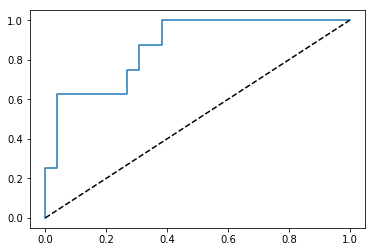

In [113]:
# only fit with totalmean
X2_train, X2_test, y2_train, y2_test = train_test_split(X_Mean,y2,test_size=0.5,random_state=42)
model_Mean = LogisticRegression(penalty='l2',C=2)
model_Mean.fit(X2_train,y2_train)
print("Logistic accuracy is %2.2f" % accuracy_score(y2_test, model_Mean.predict(X2_test)))
logit_roc_auc2 = roc_auc_score(y2_test,model_Mean.predict(X2_test))
print("Logistic AUC = %2.2f" % logit_roc_auc2)
print (classification_report(y2_test,model_Mean.predict(X2_test)))
fpr, tpr, thresholds = roc_curve(y2_test, model_Mean.predict_proba(X2_test)[:,1])
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.show()

Logistic accuracy is 0.82
Logistic AUC = 0.62
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        26
           1       1.00      0.25      0.40         8

    accuracy                           0.82        34
   macro avg       0.91      0.62      0.65        34
weighted avg       0.86      0.82      0.78        34



C:\Users\Jieyun Hu\Anaconda3\envs\image\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


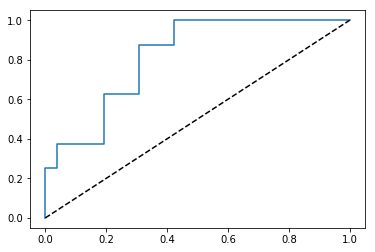

In [114]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X_MSEdev,y2,test_size=0.5,random_state=42)
model_MSEdev = LogisticRegression(penalty='l2',C=2)
model_MSEdev.fit(X3_train,y3_train)
print("Logistic accuracy is %2.2f" % accuracy_score(y3_test, model_MSEdev.predict(X3_test)))
logit_roc_auc3 = roc_auc_score(y3_test,model_MSEdev.predict(X3_test))
print("Logistic AUC = %2.2f" % logit_roc_auc3)
print (classification_report(y3_test,model_MSEdev.predict(X3_test)))
fpr, tpr, thresholds = roc_curve(y3_test, model_MSEdev.predict_proba(X3_test)[:,1])
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.show()

Logistic accuracy is 0.88
Logistic AUC = 0.79
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        26
           1       0.83      0.62      0.71         8

    accuracy                           0.88        34
   macro avg       0.86      0.79      0.82        34
weighted avg       0.88      0.88      0.88        34



C:\Users\Jieyun Hu\Anaconda3\envs\image\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


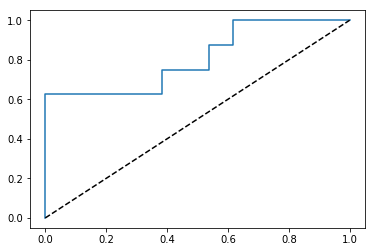

In [115]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X_devMean,y2,test_size=0.5,random_state=42)
model_devMean = LogisticRegression(penalty='l2',C=2)
model_devMean.fit(X4_train,y4_train)
print("Logistic accuracy is %2.2f" % accuracy_score(y4_test, model_devMean.predict(X4_test)))
logit_roc_auc4 = roc_auc_score(y4_test,model_devMean.predict(X4_test))
print("Logistic AUC = %2.2f" % logit_roc_auc4)
print (classification_report(y4_test,model_devMean.predict(X4_test)))
#ROC curve
fpr, tpr, thresholds = roc_curve(y4_test, model_devMean.predict_proba(X4_test)[:,1])
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.show()


In [117]:
weights_devMean = pd.Series(model_devMean.coef_[0], index = ['dev1','dev2','dev3','dev4','mean1','mean2','mean3','mean4'])
print(weights_devMean)

dev1    -0.801864
dev2    -0.258055
dev3    -0.999529
dev4     0.021003
mean1    0.479024
mean2    1.108425
mean3    0.713064
mean4    1.089124
dtype: float64
